## Chapter 4 -  Training Models

### Polynomial Regression

In cases where the model is more complex than a straight line, we use polynomial regression to fit the data. The following example uses a polynomial regression function.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

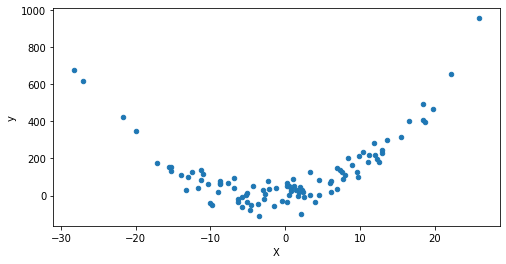

In [2]:
# Generate y = X^2 - 6X + 5 with noise N(0,1)
m = 100
X = np.random.normal(0,10,m).flatten()
y = X**2 + 6 * X + 5 + np.random.normal(0,50,m).flatten()
df_Xy = pd.DataFrame({'X' : X, 'y' : y})
df_Xy.plot(kind='scatter', x='X', y='y', figsize=(8,4))
plt.show()

Clearly, a straight line cannot fit this dataset, so we need to transform the training data to add the square of each feature as new features.

In [3]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_b = np.c_[X]
print(X_b[:3])
X_poly = poly_features.fit_transform(X_b)
print(X_poly[:3])

[[11.23842742]
 [18.43161261]
 [-2.93264648]]
[[ 11.23842742 126.30225082]
 [ 18.43161261 339.72434352]
 [ -2.93264648   8.6004154 ]]


In [4]:
# Train
reg = LinearRegression()
reg.fit(X_poly, y)
print(reg.intercept_, reg.coef_)

1.049081710164387 [5.78835236 1.05715845]


In [5]:
poly_theta_hat = np.concatenate([np.array([reg.intercept_,]), reg.coef_])
print(poly_theta_hat)

[1.04908171 5.78835236 1.05715845]


In [6]:
# Test the model using new X_test
lin_X = np.linspace(X.min(), X.max(),m)
# Intercept to largest power of X
lin_X_b = np.c_[np.ones(m), lin_X, lin_X*lin_X]
lin_y = np.dot(lin_X_b, poly_theta_hat)
y_test = np.c_[lin_X, lin_y]
df_y_test = pd.DataFrame(y_test, columns=['X', 'y'])

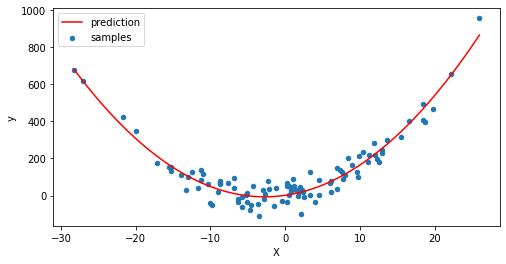

In [7]:
fig, ax = plt.subplots(figsize=(8,4))
df_Xy.plot(kind='scatter', x='X', y='y', ax=ax)
df_y_test.plot(kind='line', x='X', y='y', ax=ax, color='red')
ax.legend(['prediction', 'samples',])
plt.show()

### Learning Curves

In polynomial problems, fitting a straight line will underfit the training data while a high-degree polynomial regression model severely overfits the data. To decide how complex the model is, there are methods to do so.

In [8]:
def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    train_errors, validation_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(np.c_[X_train[:m]], y_train[:m])
        y_train_predict = model.predict(np.c_[X_train][:m])
        y_val_predict = model.predict(np.c_[X_test])
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        validation_errors.append(mean_squared_error(y_val_predict, y_test))
    fig, ax = plt.subplots(figsize=(10,5))
    errors_df = pd.DataFrame({'m' : range(1,len(train_errors)+1), 
                              'train' : np.sqrt(train_errors), 
                              'validation' : np.sqrt(validation_errors)})
    errors_df.plot(x='m', y='validation', ax=ax, label='validation', color='blue')
    errors_df.plot(x='m', y='train', ax=ax, label='train', color='red', marker='+')
    ax.set_ylabel('Error (RMSE)')
    ax.set_xlabel('m')

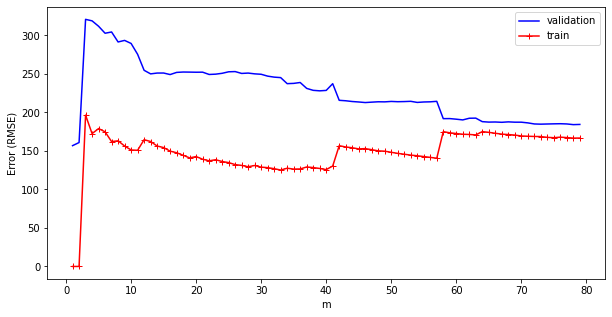

In [9]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

When there is a small sample in the training set, the model fits perfectly (red line). The RMSE is 0. But when new instances are added to the training set, it is not possible to fit the model perfectly, simply because the data is not linear. So the error on the training graph increases until a plateau. 

For the validation data (blue), when the model is trained on few instances, the validation error is large. With more instances shown, the validation error slowly decreases. But since the linear model is inappropriate for the dataset, the error ends up in a plateau.

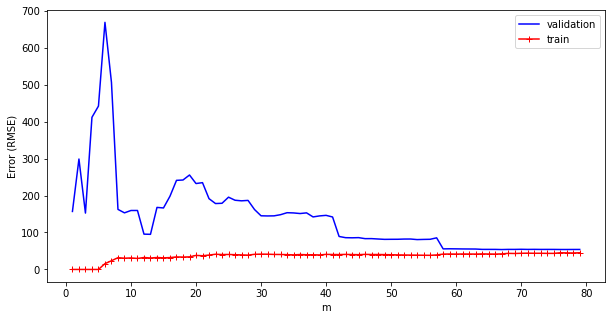

In [10]:
# 4 degree polynomial
poly10_features = PolynomialFeatures(degree=4, include_bias=False)
X_b = np.c_[X]
X10_poly = poly10_features.fit_transform(X_b)

plot_learning_curves(lin_reg, X10_poly, y)

For a 4 degree polynomial, the error on the training data (red line) is much lower. There is a gap between the curves, which means the model performs significantly better on the training set than the validation set. This clearly shows an overfitted model. 

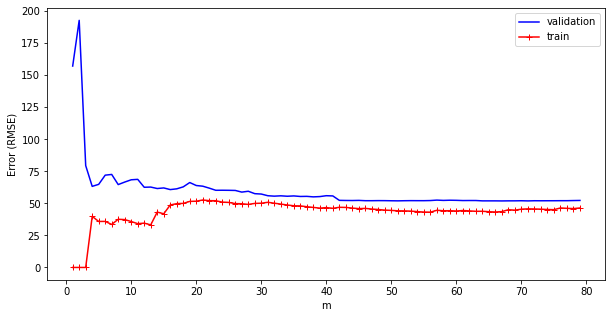

In [11]:
# 2 degree polynomial
poly2_features = PolynomialFeatures(degree=2, include_bias=False)
X_b = np.c_[X]
X2_poly = poly2_features.fit_transform(X_b)

plot_learning_curves(lin_reg, X2_poly, y)